# Autoencoder implementation on the Fashion MNIST dataset

### 1. Imports

In [21]:
# Imports 
import os 

import numpy as np 

import torch
from torchvision.datasets import FashionMNIST
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
# Checking for CUDA device 
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU available and ready to use")
else:
    device = torch.device("cpu")
    print("GPU not available, using the CPU instead")

GPU available and ready to use


### 2. Loading the dataset

In [3]:
# downloading the dataset

datapath = ".\data\FasionMNIST"  # Path of the downloaded (or to download) data

# Check if data is already downloaded, if it is just load it, otherwise fetch it
if os.path.isdir(datapath):
    Train_dataset = FashionMNIST(root = datapath + "\Train", download = False)
    Test_dataset = FashionMNIST(root = datapath + "\Test", train = False, download = False)
else:
    Train_dataset = FashionMNIST(root = datapath + "\Train", download = True)
    Test_dataset = FashionMNIST(root = datapath + "\Test", train = False, download = True)

### 3. Preprocessing the dataset

In [15]:
# First, the datapoints need to be transformed to tensors#
Train = []
Test = []
for x, y in Train_dataset:
    # flattening the images (with .reshape) so they're compatible with a FFNN (Feed forward neural network)
    Train.append(torch.from_numpy(np.array(x).reshape(784)/256)) # Dividing by 256 to normalize the pixel values
    
for x, y in Test_dataset:
    Test.append(torch.from_numpy(np.array(x).reshape(784)/256))

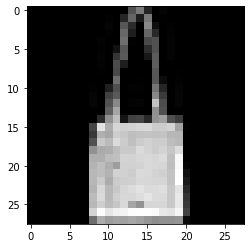

In [19]:
# showing one datapoint as an example
plt.imshow(Train[200].reshape(28,28), cmap="gray")

### 4. Creating the model's architecture

In [23]:
class AutoEncoder(nn.Module):
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        # The encoder part of the architecture
        self.encoder = nn.Sequential(
                            nn.Linear(784,300),
                            nn.ReLU(),
                            nn.Linear(300,150),
                            nn.ReLU(),
                            nn.Linear(150,25),
                            nn.ReLU(),
                            nn.Linear(25,8),
                            nn.ReLU(),
                        )
        
        # The decoder part of the architecture
        self.decoder = nn.Sequential(
                            nn.Linear(8,25),
                            nn.ReLU(),
                            nn.Linear(25,150),
                            nn.ReLU(),
                            nn.Linear(150,300),
                            nn.ReLU(),
                            nn.Linear(300,784),
                            nn.ReLU(),
                        )
    
    # Forward pass
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        
        return x
        
        